# Pre-processing of the Dataset "Titanic"

Goal:

- Create a new data set that can fit different kind of models, by removing the "NaN" and "String" variables.
- Get accuracy of different models to compare later with generated models

Titanic data set

Characteristics:
    - Number of instances: 891
    - Number of attributes: 10
    - Attribute information:
        "Survived": Wether the passenger survived or not
        "Pclass": Ticket class
        "Name": Name of the passenger
        "Sex": Gender of the passenger
        "Age": Age of the passenger
        "SibSp": Number of simblings / spouses aboard the Titanic
        "Parch": Number of parents / children aboard the Titanic
        "Ticket": Ticket number
        "Fare": Passenger fare
        "Cabin": Passenger's cabin number
        "Embarked": Port of Embarkation
        
This is a copy of the Titanic dataset: https://www.kaggle.com/c/titanic
It is used by many beginners in Machine Learning to getting started in this domain.

In [1]:
import numpy as np 
import pandas as pd 

## Exploring the Titanic data set

### 1. Importing the data set

In [3]:
df = pd.read_csv('../Data/titanic/train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

### 2. Data pre-processing

#### Missing values

Counting the number of  missing values of each features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see that there are no missing values in most features. But there is a lot of them in "Cabin", some in "Sex" and barely any in "Embarked"  

We decided to give up on the "Cabin" feature because there is more than 3/4 of values missing.

In [7]:
df['Title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
df.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Don               1
Mme               1
Jonkheer          1
Lady              1
Sir               1
Ms                1
the Countess      1
Capt              1
Name: Title, dtype: int64

We the group each of those "Titles" to more general ones according to the fact that we are looking for the missing age value.

In [8]:
normalized_title = {
            'Mr':"Mr",
            'Mrs': "Mrs",
            'Ms': "Mrs",
            'Mme':"Mrs",
            'Mlle':"Miss",
            'Miss':"Miss",
            'Master':"Master",
            'Dr':"Officer",
            'Rev':"Officer",
            'Col':"Officer",
            'Capt':"Officer",
            'Major':"Officer",
            'Lady':"Royalty",
            'Sir':"Royalty",
            'the Countess':"Royalty",
            'Dona':"Royalty",
            'Don':"Royalty",
            'Jonkheer':"Royalty"
            
}
df.Title = df.Title.map(normalized_title)

In [9]:
df.Title.value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

We verify if the "Title" feature that we extracted do fit the data set

In [11]:
grouped = df.groupby(['Sex','Title','Pclass'])
grouped.Age.median()

Sex     Title    Pclass
female  Miss     1         30.0
                 2         24.0
                 3         18.0
        Mrs      1         40.0
                 2         31.5
                 3         31.0
        Officer  1         49.0
        Royalty  1         40.5
male    Master   1          4.0
                 2          1.0
                 3          4.0
        Mr       1         40.0
                 2         31.0
                 3         26.0
        Officer  1         51.0
                 2         46.5
        Royalty  1         40.0
Name: Age, dtype: float64

We affect the median age of the differents group to fill the missing values of our data set

In [12]:
df.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

We fill the cabin feature with "U" for "Unknown"

In [11]:
df.Cabin = df.Cabin.fillna('U')

We fill the 2 missing values of "Embarked" with the most common value

In [12]:
most_Embarked = df.Embarked.value_counts().index[0]
df.Embarked = df.Embarked.fillna(most_Embarked)

We check that we indeed remove every missing value

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

We store the resulting data set in the variable "titanic_no_nan"

In [14]:
titanic_no_nan = df

#### String values

We create a fonction allowing us to create "dummie features" to split string features in categoricals features

In [15]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

We use it on "Embarked" , "Title" and "Sex" features because we can split them in a little numbers of smaller features

In [16]:
titanic_no_str = create_dummies(df,'Embarked')
titanic_no_str = create_dummies(titanic_no_str,'Title')
titanic_no_str = create_dummies(titanic_no_str,'Sex')

Then, we can drop all string features

In [17]:
titanic_no_str = titanic_no_str.drop('Embarked',axis = 1)
titanic_no_str = titanic_no_str.drop('Title',axis = 1)
titanic_no_str = titanic_no_str.drop('Ticket',axis = 1)
titanic_no_str = titanic_no_str.drop('Cabin',axis = 1)
titanic_no_str = titanic_no_str.drop('Name',axis = 1)
titanic_no_str = titanic_no_str.drop('Sex',axis = 1)
titanic_no_str.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Sex_female,Sex_male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,0,0,0,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0,1,0,0,0,0,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,0,0,0,1,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,0,0,1


Keeping "titanic_no_str" as a variable

### Exploratory Data Analysis

In [23]:
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Visualizing the correlation matrix:

In [30]:
df = titanic_no_nan
df_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare']
for x in df_x:
    if df[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(df[[x, 'Survived']].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

print(pd.crosstab(df['Title'],df['Survived']))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
---------- 

Survival Correlation by: Title
     Title  Survived
0   Master  0.575000
1     Miss  0.701087
2       Mr  0.156673
3      Mrs  0.795276
4  Officer  0.277778
5  Royalty  0.600000
---------- 

Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survived    0    1
Title             
Master     17   23
Mi

Let us investigate how "Survived" vary with those features

In [36]:
PClass_ratio = df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [37]:
Sex_ratio = df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [38]:
SibSp_ratio = df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [39]:
Parch_ratio = df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

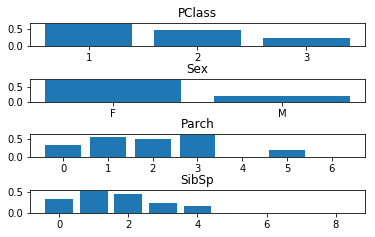

In [40]:
ax_PClass = plt.subplot(811)
PClass_graph = ax_PClass.bar(PClass_ratio["Pclass"], PClass_ratio["Survived"],tick_label = [1,2,3])
plt.title("PClass")

ax_Parch = plt.subplot(815)
Parch_graph = ax_Parch.bar(Parch_ratio["Parch"], Parch_ratio["Survived"])
plt.title("Parch")

ax_Sex = plt.subplot(813)
Sex_graph = ax_Sex.bar(Sex_ratio["Sex"], Sex_ratio["Survived"],tick_label = ["F","M"])
plt.title("Sex")

ax_SibSp = plt.subplot(817)
SibSp_graph = ax_SibSp.bar(SibSp_ratio["SibSp"], SibSp_ratio["Survived"])
plt.title("SibSp")

plt.show()

- The first class have a much higher chance of surviving than third class, while second class have average chances.

- Female passengers survived a lot more than male passengers.

- People who came with an important number of family members have low chances of surviving while people who came with few (<4) have better chances and people who came alone have average chances.

### Creating our models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

We define "Survived" as our feature to predict 

Then, we split our data set in train and test data sets with a 33% ratio

In [27]:
df = titanic_no_str
X = df.drop(['Survived'],axis=1)
y = df.Survived
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


82.55

In [29]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

64.93

In [30]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

79.53

In [31]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.54

In [32]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

37.75

In [33]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


74.16

In [34]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

64.09

In [35]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [36]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

### Displaying our results

In [37]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
2,Logistic Regression,82.55
4,Naive Bayes,80.54
1,KNN,79.53
7,Linear SVC,74.16
0,Support Vector Machines,64.93
6,Stochastic Gradient Decent,64.09
5,Perceptron,37.75


### Conclusion

By creating a leaderboard with model by their accuracy, we observe:

   - We have an overfitting problem with "Random Forest" and "Decision Tree"
   - The Perceptron model is doing extremly bad 
   - The average accuracy (removing the extreme ones) is around 75
   - Logistic Regression have the best accuracy (82.55%)

We save our processed data set to use it with our Auto-ML models

In [ ]:
df["Age"] = df["Age"].astype(int)
df["Fare"] = df["Fare"].astype(int)
df.to_csv('../Data/titanic/no_nan_no_real.csv')